In [8]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

crime_df = pd.read_csv('USArrests.csv')
crime_df.head(1)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2


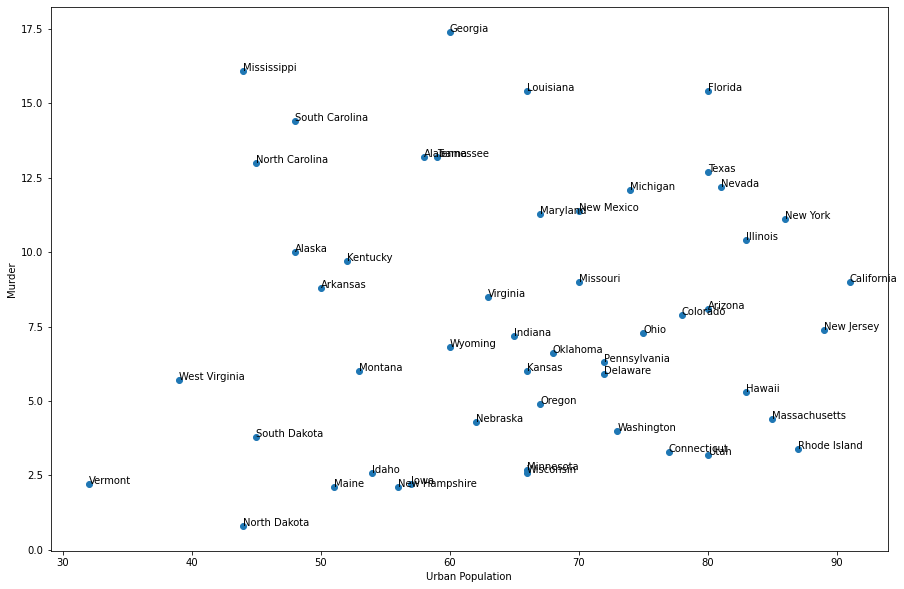

In [14]:
X = crime_df.drop('State', axis = 1)
y = crime_df['State']

_= plt.figure(figsize = (15, 10))
_= plt.scatter(X['UrbanPop'], X['Murder'])

for i, txt in enumerate(y):
    plt.annotate(txt, (X['UrbanPop'][i], X['Murder'][i]))
    
_= plt.ylabel('Murder')
_= plt.xlabel('Urban Population')
_= plt.show()

This is not terribly telling...

In [15]:
from sklearn.cluster import KMeans

inertias = []
distortions = [] # average of square distance of cluster center from the data points

for k in range(1, 10):
    model = KMeans(n_clusters = k).fit(X)
    distortion = sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1))/X.shape[0]
    distortions.append(distortion)
    
    inertia = model.inertia_
    inertias.append(inertia)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


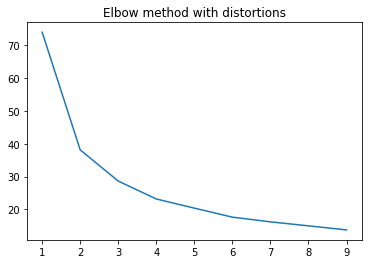

In [16]:
_= plt.plot(range(1, 10), distortions)
_= plt.title('Elbow method with distortions')

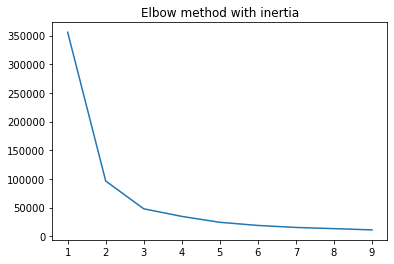

In [18]:
_= plt.plot(range(1, 10), inertias)
_= plt.title('Elbow method with inertia')

### Hierarchical Clustering

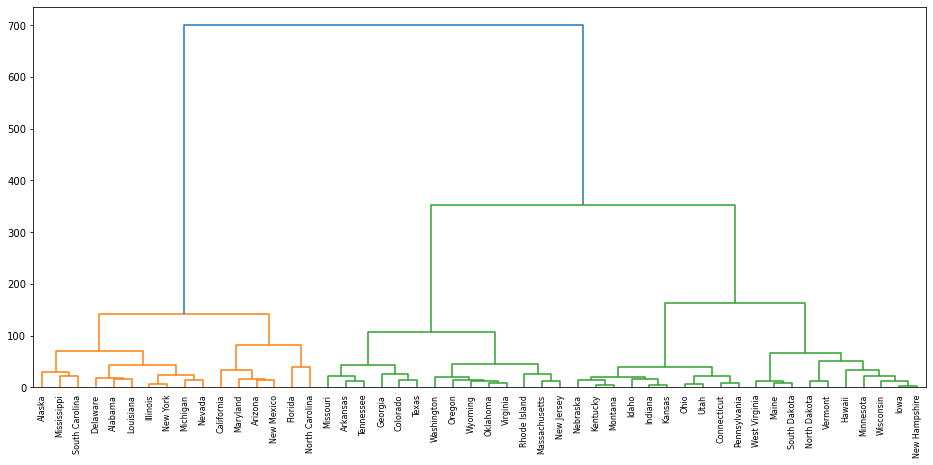

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, 'ward') # performs clustering using Ward's objective function optimalization method

_= plt.figure(figsize = (16, 7))
_= dendrogram(linked, labels = list(y)) # labels must be converted to list here first
_= plt.show()

#### Agglomerative clustering

- puts the states into clusters

In [27]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') #create an instance
cluster.fit_predict(X) # gives the cluster each state belongs to

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

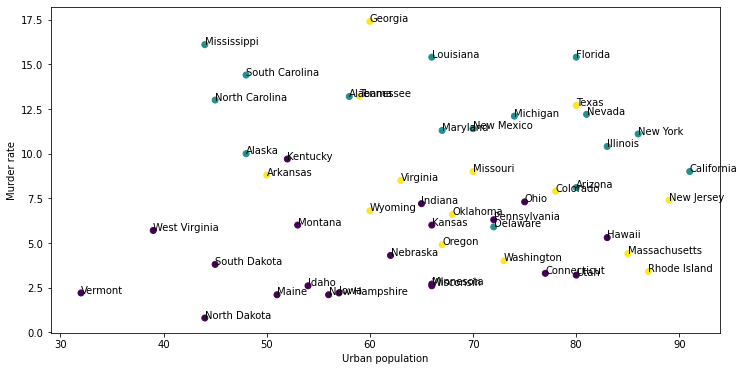

In [28]:
_= plt.figure(figsize = (12, 6))
_= plt.scatter(X['UrbanPop'], X['Murder'], c = cluster.labels_)

for i, txt in enumerate(y):
    plt.annotate(txt, (X['UrbanPop'][i], X['Murder'][i]))

_= plt.xlabel('Urban population')
_= plt.ylabel('Murder rate')
_= plt.show()

### Dimensionality reduction

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

diabetes_df = pd.read_csv("../WEEK13/diabetes.csv")

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

#logistic regression
clr = LogisticRegression(random_state=42).fit(X_train_sc,y_train)

#predict
y_predicted = clr.predict(X_test_sc)
# print(y_predicted)

print(clr.score(X_test_sc,y_test))

0.7359307359307359
